In [1]:
import tensorflow as tf
print(tf.__version__)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print('import tensorflow and MNIST dataset under the Keras API.')

2.0.0
import tensorflow and MNIST dataset under the Keras API.


In [2]:
# batch_size = 128
# num_classes = 10
# input image dimensions
img_rows, img_cols = 28, 28

In [3]:
import matplotlib.pyplot as plt
image_index = 40347 
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

5


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.models import model_from_json
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


In [7]:
model.compile(optimizer='Adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [8]:
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 193s 3ms/step - loss: 0.2012 - accuracy: 0.9400
Epoch 2/10
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0840 - accuracy: 0.9745
Epoch 3/10
60000/60000 [==============================] - 188s 3ms/step - loss: 0.0585 - accuracy: 0.98150s - loss: 0.0585 - ac
Epoch 4/10
60000/60000 [==============================] - 167s 3ms/step - loss: 0.0460 - accuracy: 0.9856
Epoch 5/10
60000/60000 [==============================] - 174s 3ms/step - loss: 0.0362 - accuracy: 0.98751s - l
Epoch 6/10
60000/60000 [==============================] - 183s 3ms/step - loss: 0.0282 - accuracy: 0.9901
Epoch 7/10
60000/60000 [==============================] - 173s 3ms/step - loss: 0.0268 - accuracy: 0.9910
Epoch 8/10
60000/60000 [==============================] - 186s 3ms/step - loss: 0.0223 - accuracy: 0.9920
Epoch 9/10
60000/60000 [==============================] - 181s 3ms/step - loss: 0.0208 - accuracy: 0.9925
Epoch 10/10
60000/

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: %g %%"%(score[0]*100))
print("Test accuracy: %g %%"%(score[1]*100))

Test loss: 6.90622 %
Test accuracy: 98.51 %


    ## NOTE individual predictions 

2


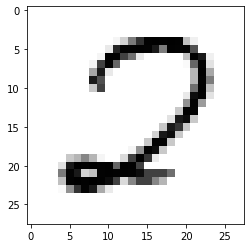

In [10]:
image_index = 421
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, img_rows, img_cols, 1))
print(pred.argmax())

<H3>Save the structure of the model itself as well as the weights that we’ll later load using flask</H3>

In [11]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)
model.save_weights("model.h5")